# Lab 11

## Section 1: PyTorch 



## Import Torch

In [1]:
pip install torch torchvision torchaudio

   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/113.8 MB 202.1 kB/s eta 0:09:


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---- ---------------------------------- 11.8/113.8 MB 300.3 kB/s eta 0:05:40
   ---- ---------------------------------- 11.8/113.8 MB 300.3 kB/s eta 0:05:40
   ---- ---------------------------------- 12.1/113.8 MB 300.6 kB/s eta 0:05:39
   ---- ---------------------------------- 12.1/113.8 MB 300.6 kB/s eta 0:05:39
   ---- ---------------------------------- 12.1/113.8 MB 300.6 kB/s eta 0:05:39
   ---- ---------------------------------- 12.1/113.8 MB 300.6 kB/s eta 0:05:39
   ---- ---------------------------------- 12.1/113.8 MB 300.6 kB/s eta 0:05:39
   ---- ---------------------------------- 12.1/113.8 MB 300.6 kB/s eta 0:05:39
   ---- ---------------------------------- 12.3/113.8 MB 298.0 kB/s eta 0:05:41
   ---- ---------------------------------- 12.3/113.8 MB 298.0 kB/s eta 0:05:41
   ---- ---------------------------------- 12.3/113.8 MB 298.0 kB/s eta 0:05:41
   ---- ---------------------------------- 12.6/113.8 MB 317.8 kB/s eta 0:05:19
   ---- --------------------------------

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim 

### Task 1: GPU/Device Agnostic Code
**Goal:** Write code that runs on CPU, CUDA, or MPS (Mac) automatically.


In [9]:
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f'Using device: {device}')


sample_input = torch.randn(1, 10).to(device)
type(sample_input)

Using device: cpu


torch.Tensor

## Section 2: MNIST Project 
Step 1: What is MNIST & Downloading Data

Concept: MNIST is the "Hello World" of Machine Learning. It contains 70,000 images of handwritten digits (0-9).

The Goal: Teach the computer to look at a grid of pixels and say "That is a 7".

The Data: Each image is grayscale and exactly 28×28


In [9]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [18]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# transform=ToTensor() converts the image (0-255) to a Torch Tensor (0.0-1.0)

In [ ]:
# Do for Testing

## Visualizing One Image & Understanding Shapes

60000

10000

torch.Size([1, 28, 28])

torch.Size([28, 28])

## Display one Image in MatplotLib

In [55]:
import matplotlib.pyplot as plt

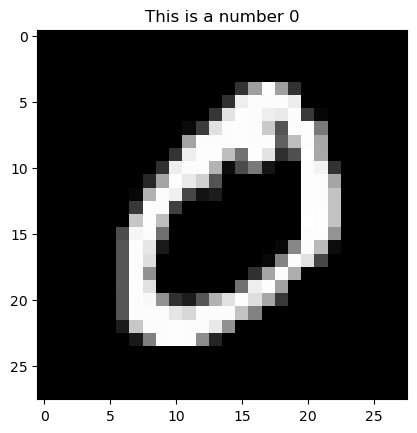

# Calculation for the Input Layer

Concept: We are building a Linear (Feed-Forward) Network,

A Linear Layer consists of neurons in a single vertical line.

Our image is a square grid (28×28).

The Division: We must "cut" the image row by row and stack them into one long line.

The Calculation:

Height×Width=Total Input Features
28×28=784
So, our Input Layer must have 784 neurons.

In [57]:
img, label = training_data[1]

In [59]:
img.squeeze().shape

torch.Size([28, 28])

## The Architecture (1 Input, 1 Hidden, 1 Output
The Concept: We will build the simplest standard network.

Input Layer (784): Receives the pixels.

Hidden Layer (128): The "brain" that learns shapes (loops, lines). We pick 128 because it's enough to learn but not too big.

Output Layer (10): The final decision. We have 10 digits (0-9), so we need 10 output scores.

SimpleNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


## Understanding Batch Size (The Stack)

The Concept: Think of the model like a teacher grading exams.

Batch Size = 1: The teacher grades 1 exam, updates the grade book, then picks up the next exam. (Too slow).

Batch Size = 64: The teacher picks up a stack of 64 exams, grades them all at once, and updates the grade book one time for the whole stack. (Much faster).

We use DataLoader to create these "stacks" for us.

In [ ]:
from torch.utils.data import DataLoader

# Create stacks
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
# do for Test_data

print(len(train_loader),"--",len(test_loader))


938 -- 157


## The Training Loop

In [67]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [73]:
train()

Batch 0: Loss = 2.2587
Batch 100: Loss = 0.4718
Batch 200: Loss = 0.2364
Batch 300: Loss = 0.3395
Batch 400: Loss = 0.1946
Batch 500: Loss = 0.3256
Batch 600: Loss = 0.1262
Batch 700: Loss = 0.2901
Batch 800: Loss = 0.4627
Batch 900: Loss = 0.0775


Test Accuracy: 94.6%
